In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Conducting EDA

#### First step is to handle missing data in the dataset

In [34]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

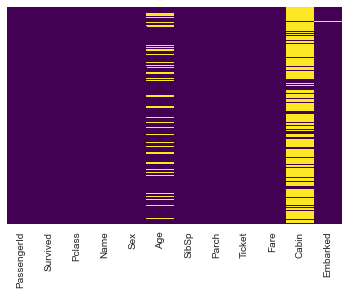

In [35]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

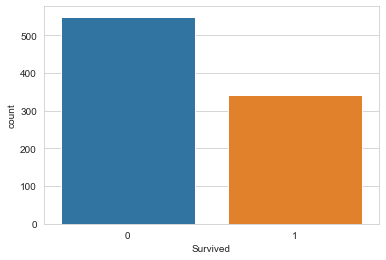

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

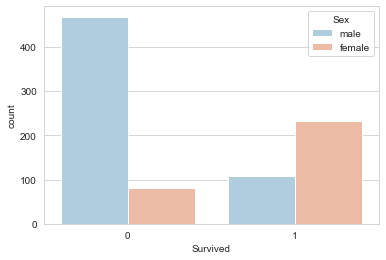

In [37]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue='Sex',data=train, palette="RdBu_r")

<AxesSubplot:xlabel='Survived', ylabel='count'>

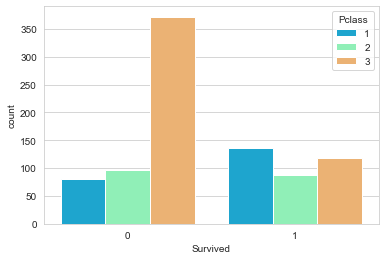

In [38]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue='Pclass',data=train, palette="rainbow")

C:\Users\naman solanki\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

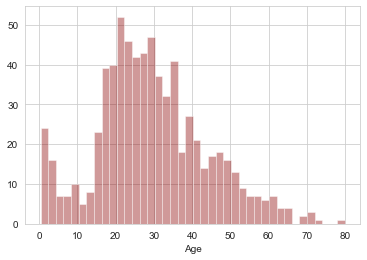

In [39]:
sns.distplot(train["Age"].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

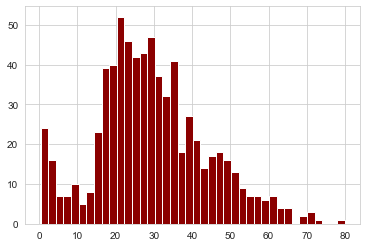

In [40]:
# also can be done with matplotlib
train['Age'].hist(bins=40,color='darkred',alpha=1)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

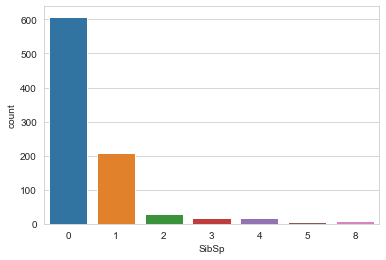

In [41]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

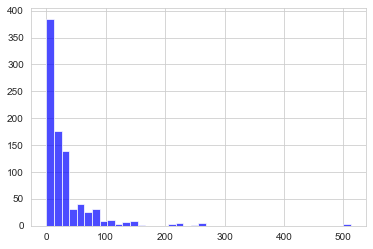

In [42]:
train['Fare'].hist(bins=40,color='blue',alpha=0.7)

#### Now we clean the data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

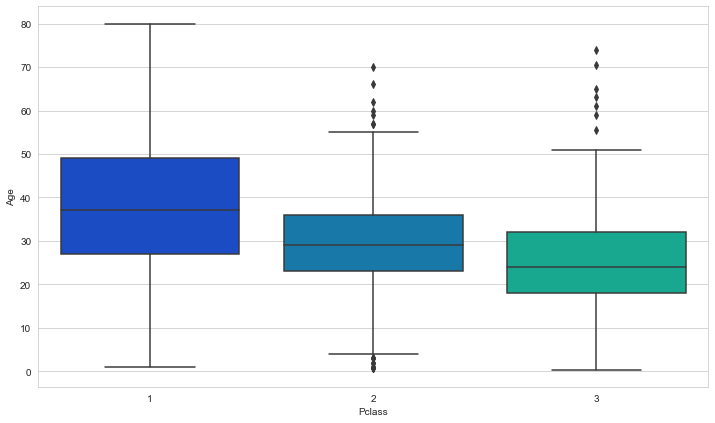

In [43]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [44]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

In [45]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

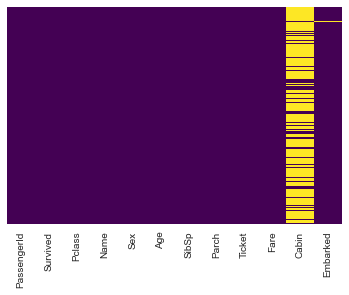

In [46]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [47]:
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

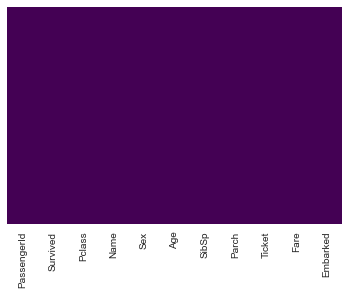

In [50]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [49]:
train.dropna(inplace=True)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [52]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [53]:
pd.get_dummies(train['Sex'], drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [54]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
sex = pd.get_dummies(train['Sex'], drop_first=True)

train.drop(['Sex', 'Name', 'Embarked', 'Ticket'], axis=1, inplace=True)

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [55]:
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Applying Logistic Regression Using Sklearn

In [56]:
train.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [57]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size = 0.30, random_state = 101)

In [88]:
from sklearn.linear_model import LogisticRegression

In [100]:
logmodel = LogisticRegression(max_iter=600)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [101]:
predictions = logmodel.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
accuracy = confusion_matrix(y_test, predictions)

In [104]:
accuracy

array([[149,  14],
       [ 33,  71]], dtype=int64)

In [105]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8239700374531835

## Trying model on test.csv

In [154]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [155]:
survivals = pd.read_csv('gender_submission.csv')
survivals.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [156]:
test = pd.concat([test, survivals['Survived']], axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


<AxesSubplot:>

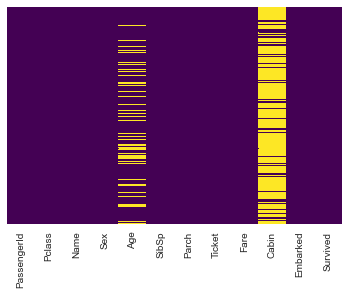

In [157]:
sns.heatmap(test.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

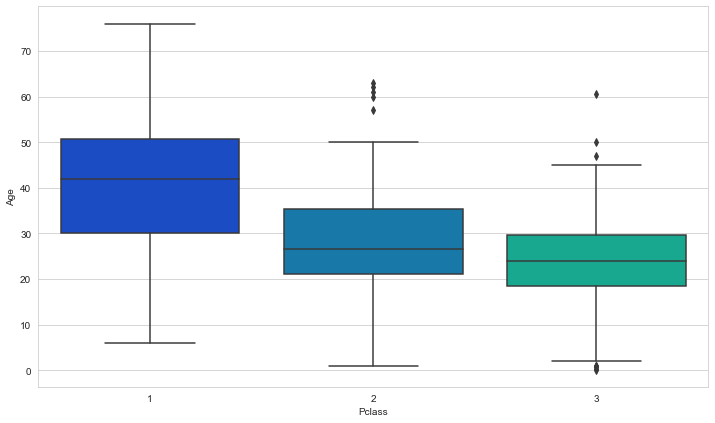

In [158]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')

In [159]:
def impute_age_new(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 43
        elif Pclass == 2:
            return 26
        elif Pclass == 3:
            return 24
    else:
        return Age

In [160]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age_new, axis=1)

<AxesSubplot:>

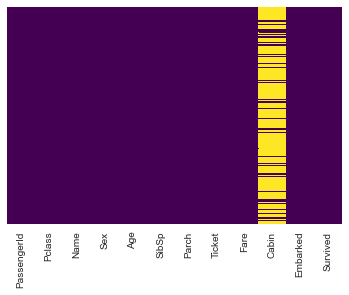

In [163]:
sns.heatmap(test.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [164]:
test.drop('Cabin', axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


<AxesSubplot:>

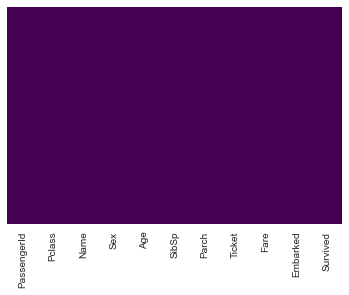

In [165]:
sns.heatmap(test.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [166]:
embark1 = pd.get_dummies(test['Embarked'], drop_first=True)
sex1 = pd.get_dummies(test['Sex'], drop_first=True)

test.drop(['Sex', 'Name', 'Embarked', 'Ticket'], axis=1, inplace=True)

test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,892,3,34.5,0,0,7.8292,0
1,893,3,47.0,1,0,7.0000,1
2,894,2,62.0,0,0,9.6875,0
3,895,3,27.0,0,0,8.6625,0
4,896,3,22.0,1,1,12.2875,1


In [167]:
test = pd.concat([test, sex1, embark1], axis=1)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,892,3,34.5,0,0,7.8292,0,1,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,1


In [168]:
survivals['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [169]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
Survived       0
male           0
Q              0
S              0
dtype: int64

In [170]:
test.dropna(inplace=True)

In [171]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Survived       0
male           0
Q              0
S              0
dtype: int64

In [172]:
X_test1 = test.drop('Survived', axis=1)
predictions1 = logmodel.predict(X_test1)

In [173]:
accuracy = confusion_matrix(test["Survived"], predictions1)
accuracy

array([[249,  16],
       [ 11, 141]], dtype=int64)

In [174]:
accuracy = accuracy_score(test["Survived"], predictions1)
accuracy

0.935251798561151